# Public Transport Ridership in Malaysia from 2019 to 2025 (KTM and RapidKL)

## 1. Daily Ridership by Year

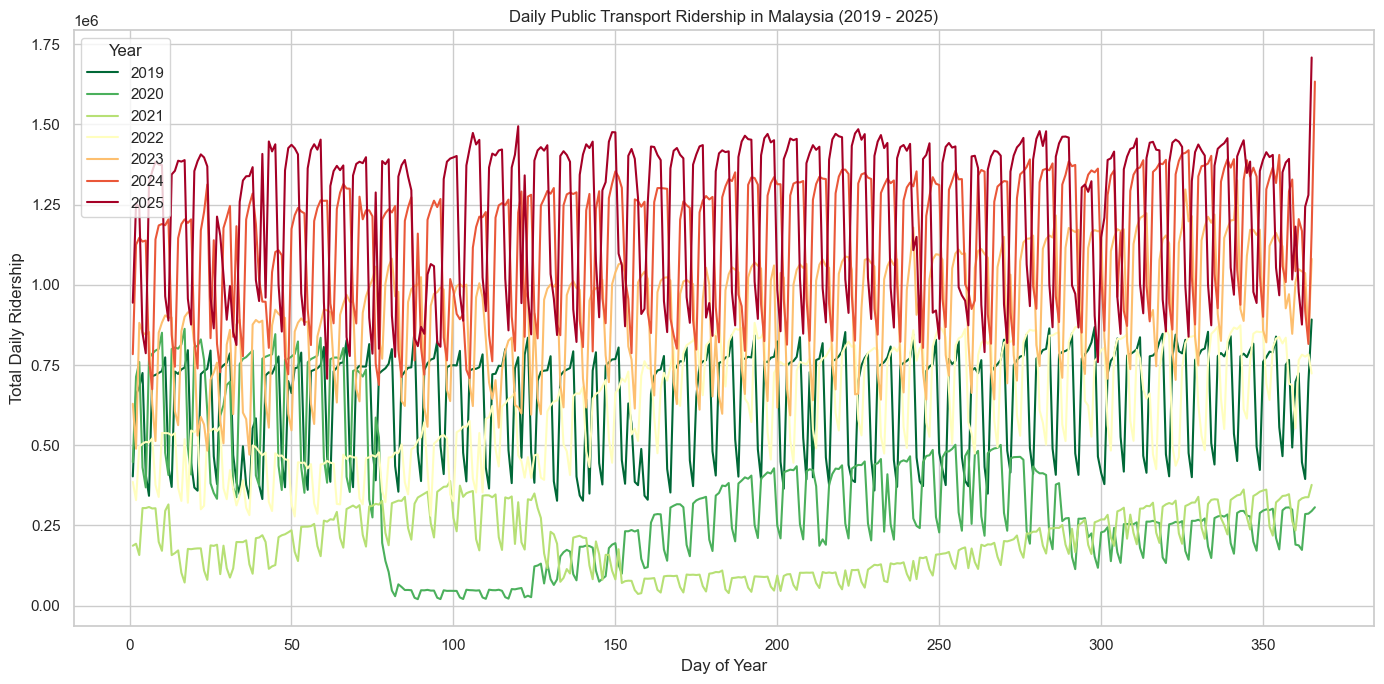

In [33]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

#Load dataset
file_path = r'C:\Users\USER\Desktop\DataVizz\Ridership7\ridership_headline.csv'
df = pd.read_csv(file_path)

#Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

#Create new columns for year and day of year
df['year'] = df['date'].dt.year
df['day_of_year'] = df['date'].dt.dayofyear

#Calculate total daily ridership
ridership_columns = df.columns.difference(['date', 'year', 'week'])
df['total_ridership'] = df[ridership_columns].sum(axis=1)

#Prepare color mapping from green to red
years = sorted(df['year'].unique())
colors = cm.RdYlGn_r(np.linspace(0, 1, len(years)))  # green → yellow → red

#Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

#Plot each year with color gradient
for year, color in zip(years, colors):
    group = df[df['year'] == year]
    plt.plot(group['day_of_year'], group['total_ridership'], label=str(year), color=color)

#Label
plt.title('Daily Public Transport Ridership in Malaysia (2019 - 2025)')
plt.xlabel('Day of Year')
plt.ylabel('Total Daily Ridership')
plt.legend(title="Year")
plt.tight_layout()

#Show
plt.show()


## 2. Weekly Average Ridership by Year

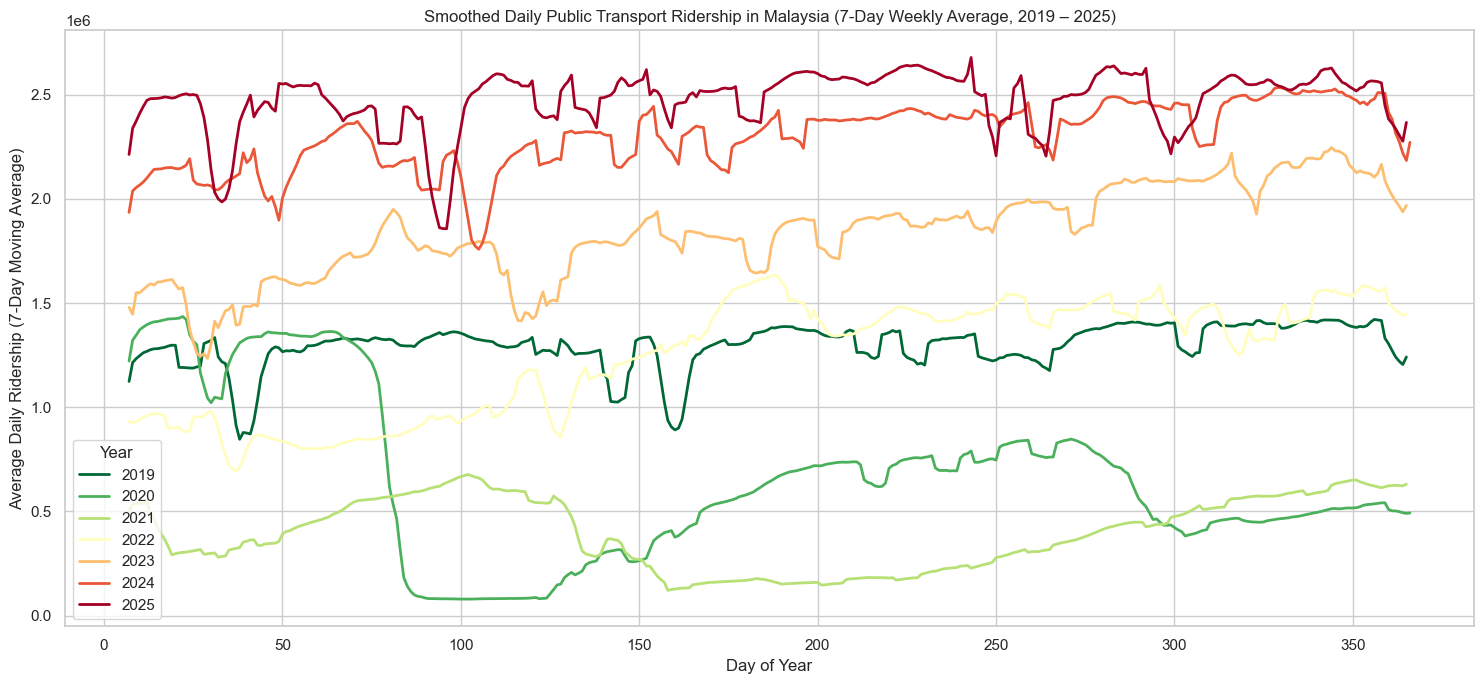

In [34]:
#Convert date column
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

#Remove rows where date failed to parse
df = df.dropna(subset=['date'])

#Sort by date
df = df.sort_values('date')

#Create time features
df['year'] = df['date'].dt.year
df['day_of_year'] = df['date'].dt.dayofyear

#Keep numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

#Remove helper
numeric_cols = numeric_cols.difference(['year', 'day_of_year'])

#Total daily ridership
df['total_ridership'] = df[numeric_cols].sum(axis=1)

#7-Day Weekly Average
df['weekly_avg_ridership'] = (
    df.groupby('year')['total_ridership']
      .transform(lambda x: x.rolling(window=7, min_periods=7).mean())
)

#Remove first 6 days of each year
df = df.dropna(subset=['weekly_avg_ridership'])

#Color mapping: Green to Red
years = sorted(df['year'].unique())
colors = cm.RdYlGn_r(np.linspace(0, 1, len(years)))

#Plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))

for year, color in zip(years, colors):
    group = df[df['year'] == year]
    plt.plot(
        group['day_of_year'],
        group['weekly_avg_ridership'],
        label=str(year),
        color=color,
        linewidth=2
    )

#Label
plt.title('Smoothed Daily Public Transport Ridership in Malaysia (7-Day Weekly Average, 2019 – 2025)')
plt.xlabel('Day of Year')
plt.ylabel('Average Daily Ridership (7-Day Moving Average)')
plt.legend(title="Year")
plt.tight_layout()

plt.show()


## 3. Average Daily Ridership per Week

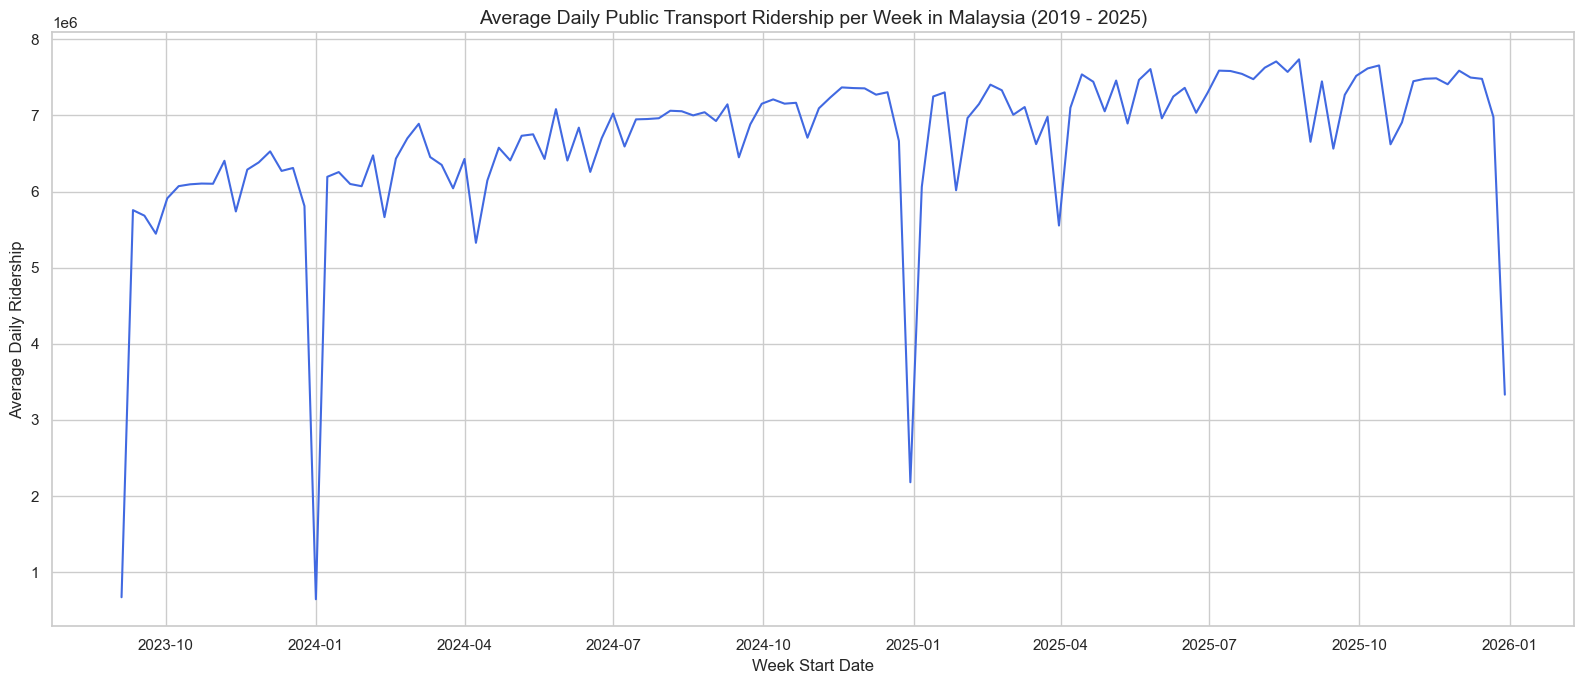

In [41]:
#Set monday as the grouping key
df['week_start'] = df['date'] - pd.to_timedelta(df['date'].dt.weekday, unit='d')

#Calculate total ridership per row
ridership_columns = df.columns.difference(['date', 'week_start'])
df['total_ridership'] = df[ridership_columns].sum(axis=1)

#Group by week start date and calculate average daily ridership
weekly_df = df.groupby('week_start')['total_ridership'].sum().reset_index()
weekly_df['avg_daily_ridership'] = weekly_df['total_ridership'] / 7

#Plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 7))

#Plot single line across time
plt.plot(weekly_df['week_start'], weekly_df['avg_daily_ridership'], color='royalblue')

#Label
plt.title('Average Daily Public Transport Ridership per Week in Malaysia (2019 - 2025)', fontsize=14)
plt.xlabel('Week Start Date')
plt.ylabel('Average Daily Ridership')
plt.tight_layout()

# Show the plot
plt.show()

## 4. Average Daily Ridership per Week for Bus (RapidKL Bus, Rapid Kuantan, Rapid Penang)

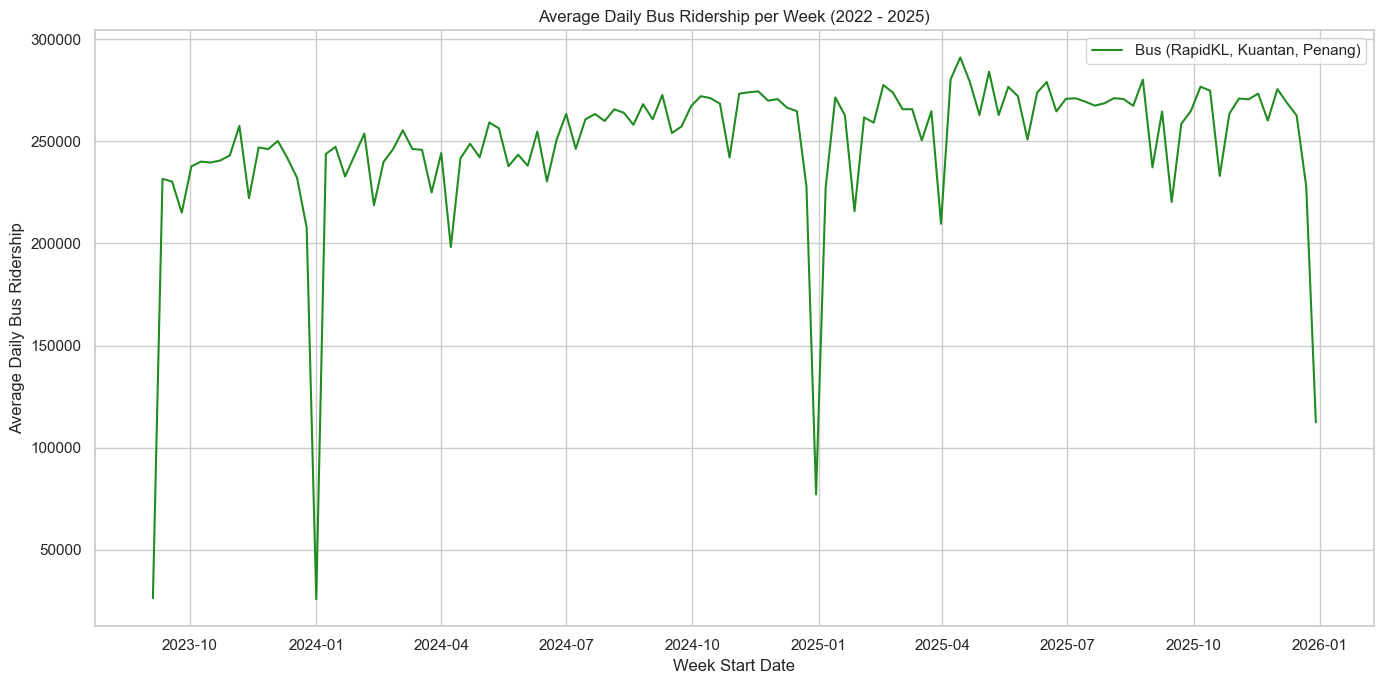

In [38]:
#Filter null
bus_columns = ['bus_rkl', 'bus_rkn', 'bus_rpn']
df = df.dropna(subset=bus_columns)

# Calculate the start of the week (Monday)
df['week_start'] = df['date'] - pd.to_timedelta(df['date'].dt.weekday, unit='d')

#Calculate total bus ridership per row
df['total_bus_ridership'] = df[bus_columns].sum(axis=1)

#Group by week and calculate average daily bus ridership
weekly_bus = df.groupby('week_start')['total_bus_ridership'].sum().reset_index()
weekly_bus['avg_daily_bus_ridership'] = weekly_bus['total_bus_ridership'] / 7

#Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

plt.plot(weekly_bus['week_start'], weekly_bus['avg_daily_bus_ridership'], color='forestgreen', label='Bus (RapidKL, Kuantan, Penang)')

#Label
plt.title('Average Daily Bus Ridership per Week (2022 - 2025)')
plt.xlabel('Week Start Date')
plt.ylabel('Average Daily Bus Ridership')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## 5. Daily Ridership for Rail (RapidRail and KTM) (Weekly Average)

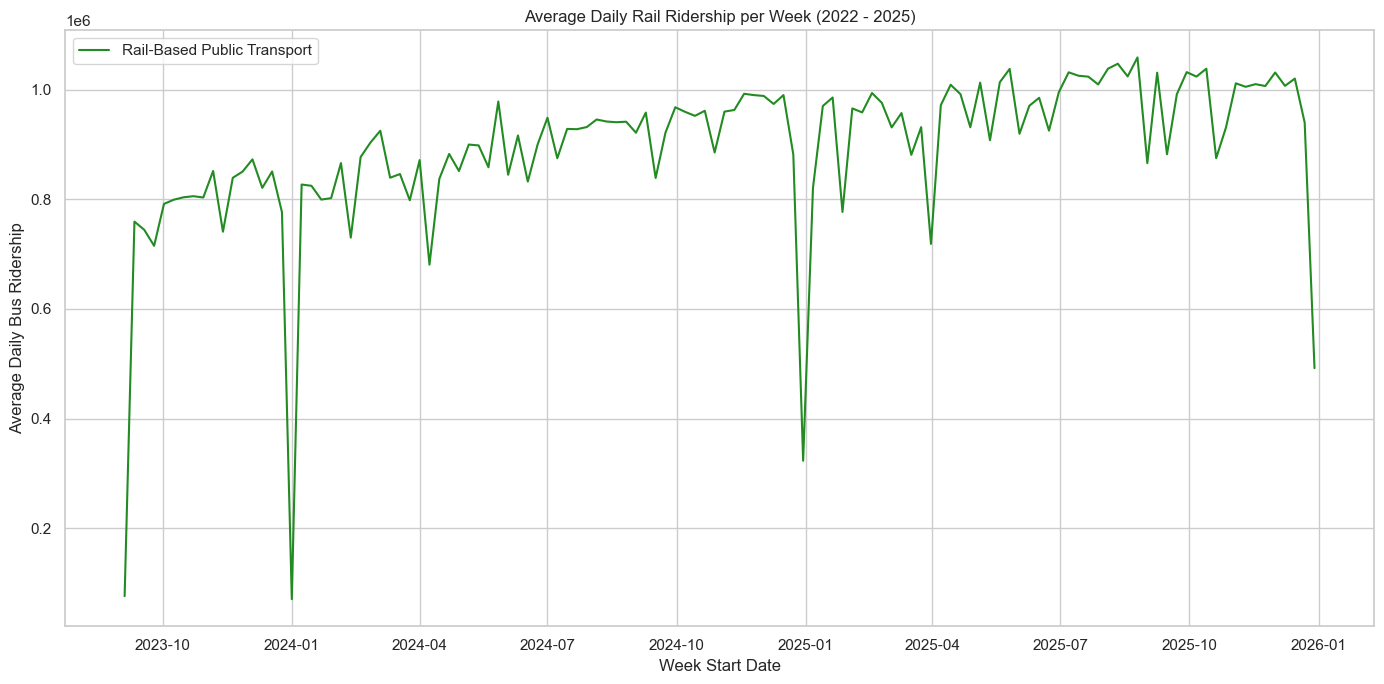

In [40]:
#Filter null
bus_columns = ['rail_lrt_ampang', 'rail_mrt_kajang', 'rail_lrt_kj', 'rail_monorail', 'rail_mrt_pjy', 'rail_ets', 'rail_intercity', 'rail_komuter_utara', 'rail_tebrau', 'rail_komuter']
df = df.dropna(subset=bus_columns)

#Calculate the start of the week (Monday)
df['week_start'] = df['date'] - pd.to_timedelta(df['date'].dt.weekday, unit='d')

#Calculate total rail ridership per row
df['total_bus_ridership'] = df[bus_columns].sum(axis=1)

#Group by week and calculate average daily rail ridership
weekly_bus = df.groupby('week_start')['total_bus_ridership'].sum().reset_index()
weekly_bus['avg_daily_bus_ridership'] = weekly_bus['total_bus_ridership'] / 7

#Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

plt.plot(weekly_bus['week_start'], weekly_bus['avg_daily_bus_ridership'], color='forestgreen', label='Rail-Based Public Transport')

#Label
plt.title('Average Daily Rail Ridership per Week (2022 - 2025)')
plt.xlabel('Week Start Date')
plt.ylabel('Average Daily Bus Ridership')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## 6. Daily Ridership for KTM (Weekly Average)

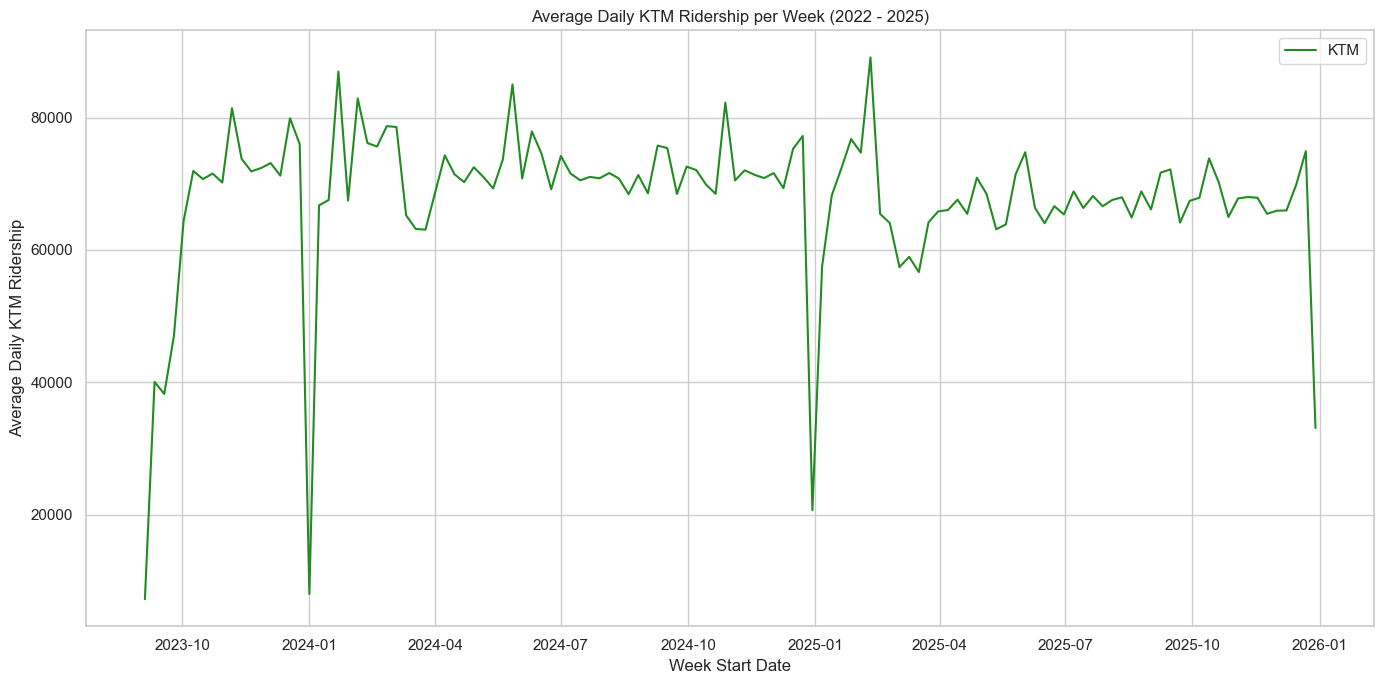

In [37]:
#Filter null
ktm_columns = ['rail_ets', 'rail_intercity', 'rail_komuter_utara', 'rail_tebrau', 'rail_komuter']
df = df.dropna(subset=ktm_columns)

#Calculate the start of the week (Monday)
df['week_start'] = df['date'] - pd.to_timedelta(df['date'].dt.weekday, unit='d')

#Calculate total KTM ridership per row
df['total_ktm_ridership'] = df[ktm_columns].sum(axis=1)

#Group by week and calculate average daily KTM ridership
weekly_ktm = df.groupby('week_start')['total_ktm_ridership'].sum().reset_index()
weekly_ktm['avg_daily_ktm_ridership'] = weekly_ktm['total_ktm_ridership'] / 7

#Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

plt.plot(weekly_ktm['week_start'], weekly_ktm['avg_daily_ktm_ridership'], color='forestgreen', label='KTM')

#Label
plt.title('Average Daily KTM Ridership per Week (2022 - 2025)')
plt.xlabel('Week Start Date')
plt.ylabel('Average Daily KTM Ridership')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## 7. Daily Ridership for RapidRail (Weekly Average)

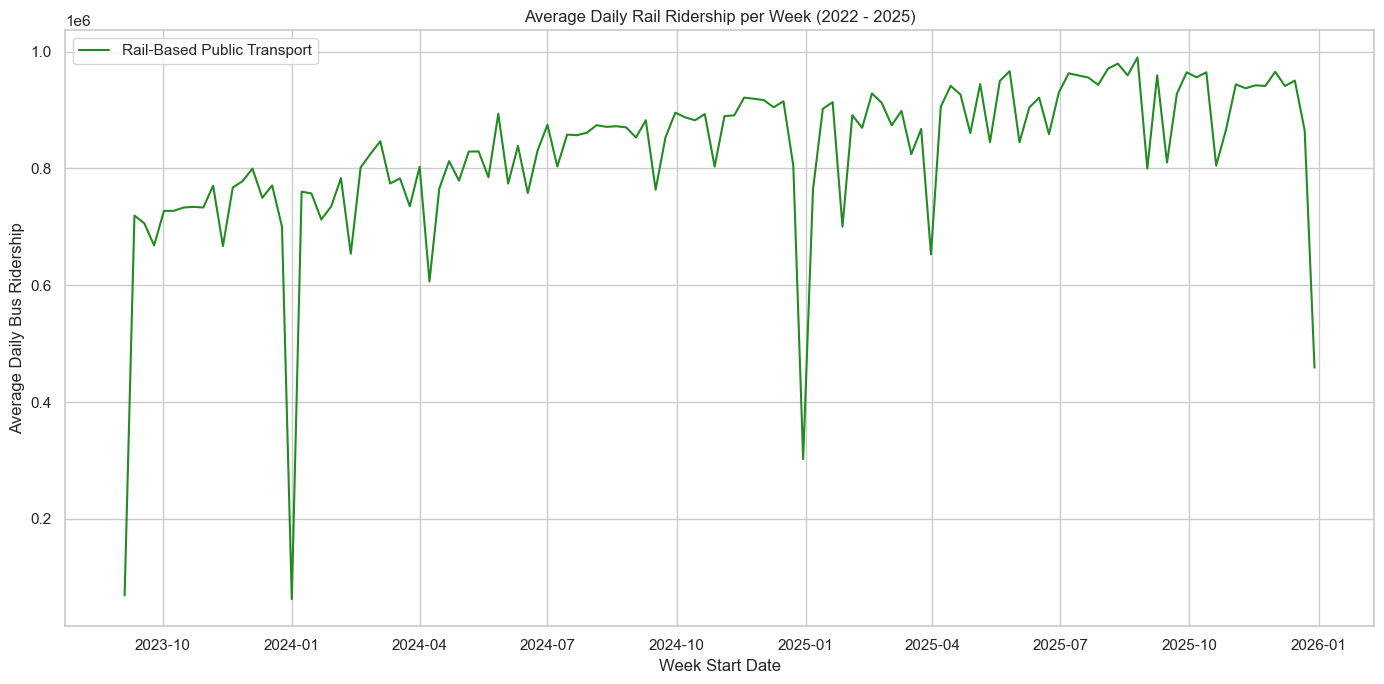

In [39]:
#Filter null
bus_columns = ['rail_lrt_ampang', 'rail_mrt_kajang', 'rail_lrt_kj', 'rail_monorail', 'rail_mrt_pjy']
df = df.dropna(subset=bus_columns)

#Calculate the start of the week (Monday)
df['week_start'] = df['date'] - pd.to_timedelta(df['date'].dt.weekday, unit='d')

#Calculate total bus ridership per row
df['total_bus_ridership'] = df[bus_columns].sum(axis=1)

#Group by week and calculate average RapidRail ridership
weekly_bus = df.groupby('week_start')['total_bus_ridership'].sum().reset_index()
weekly_bus['avg_daily_bus_ridership'] = weekly_bus['total_bus_ridership'] / 7

#Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

plt.plot(weekly_bus['week_start'], weekly_bus['avg_daily_bus_ridership'], color='forestgreen', label='Rail-Based Public Transport')

#Label
plt.title('Average Daily Rail Ridership per Week (2022 - 2025)')
plt.xlabel('Week Start Date')
plt.ylabel('Average Daily Bus Ridership')
plt.legend()
plt.tight_layout()

#Show
plt.show()

## 8. Highest Recorded Daily Ridership by Rail Line (2019 - 2025)

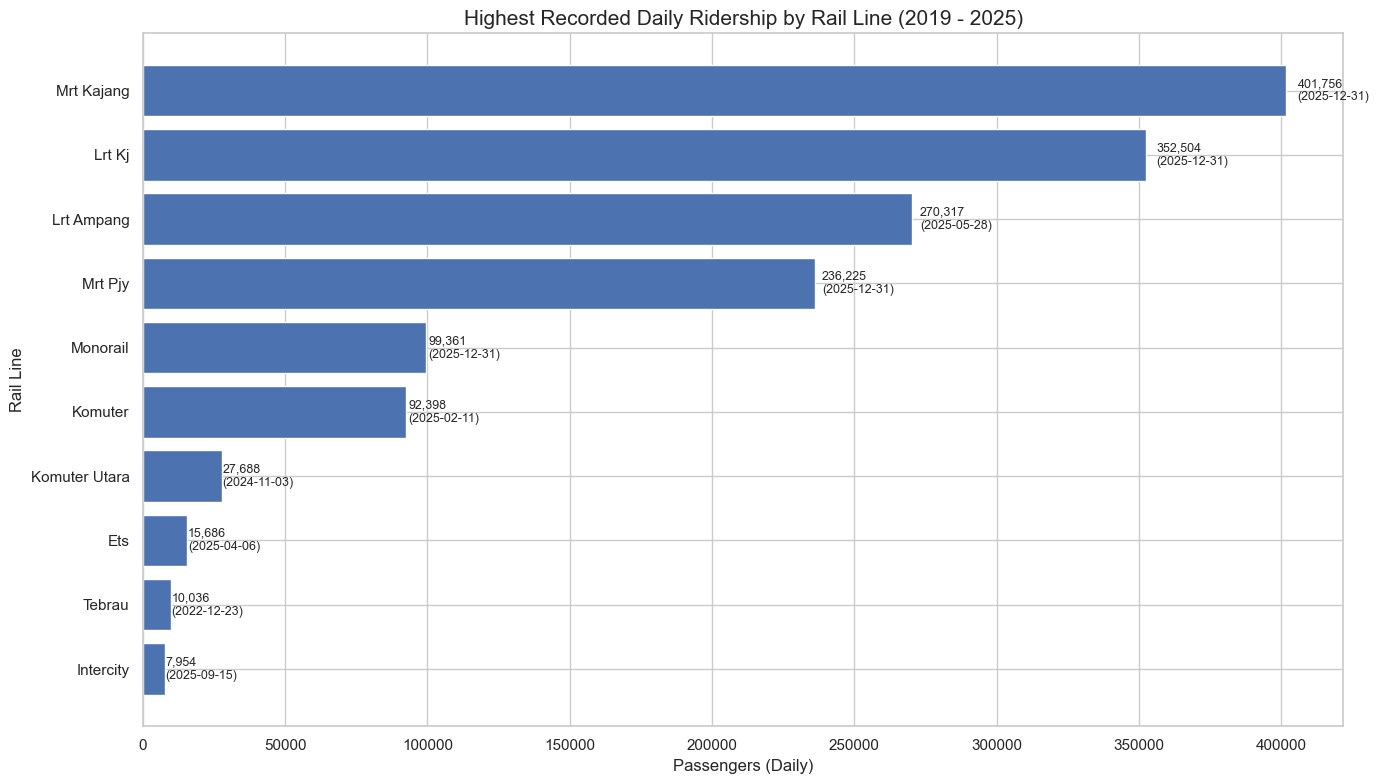

In [36]:
#Convert date
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

#Rail columns
rail_columns = [
    'rail_lrt_ampang', 'rail_mrt_kajang', 'rail_lrt_kj',
    'rail_monorail', 'rail_mrt_pjy', 'rail_ets',
    'rail_intercity', 'rail_komuter_utara', 'rail_tebrau', 'rail_komuter'
]

#Find peak ridership for each line
peak_data = []

for col in rail_columns:
    temp = df[['date', col]].dropna()

    peak_value = temp[col].max()
    peak_row = temp.loc[temp[col].idxmax()]
    peak_date = peak_row['date']

    peak_data.append([col, peak_value, peak_date])

#New dataframe
peak_df = pd.DataFrame(peak_data, columns=['line', 'peak_ridership', 'date'])

#Line names
peak_df['line_name'] = peak_df['line'].str.replace('rail_', '', regex=False)\
                                       .str.replace('_', ' ', regex=False)\
                                       .str.title()

#Lowest to highest
peak_df = peak_df.sort_values('peak_ridership')

#Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

bars = plt.barh(peak_df['line_name'], peak_df['peak_ridership'])

#Date
for i, (value, date) in enumerate(zip(peak_df['peak_ridership'], peak_df['date'])):
    plt.text(value + (value*0.01), i,
             f"{int(value):,}\n({date.date()})",
             va='center',
             fontsize=9)

#Label
plt.title('Highest Recorded Daily Ridership by Rail Line (2019 - 2025)', fontsize=15)
plt.xlabel('Passengers (Daily)')
plt.ylabel('Rail Line')

plt.tight_layout()
plt.show()

## 9. Public Transport Mode Share in Klang Valley (2023–2025)

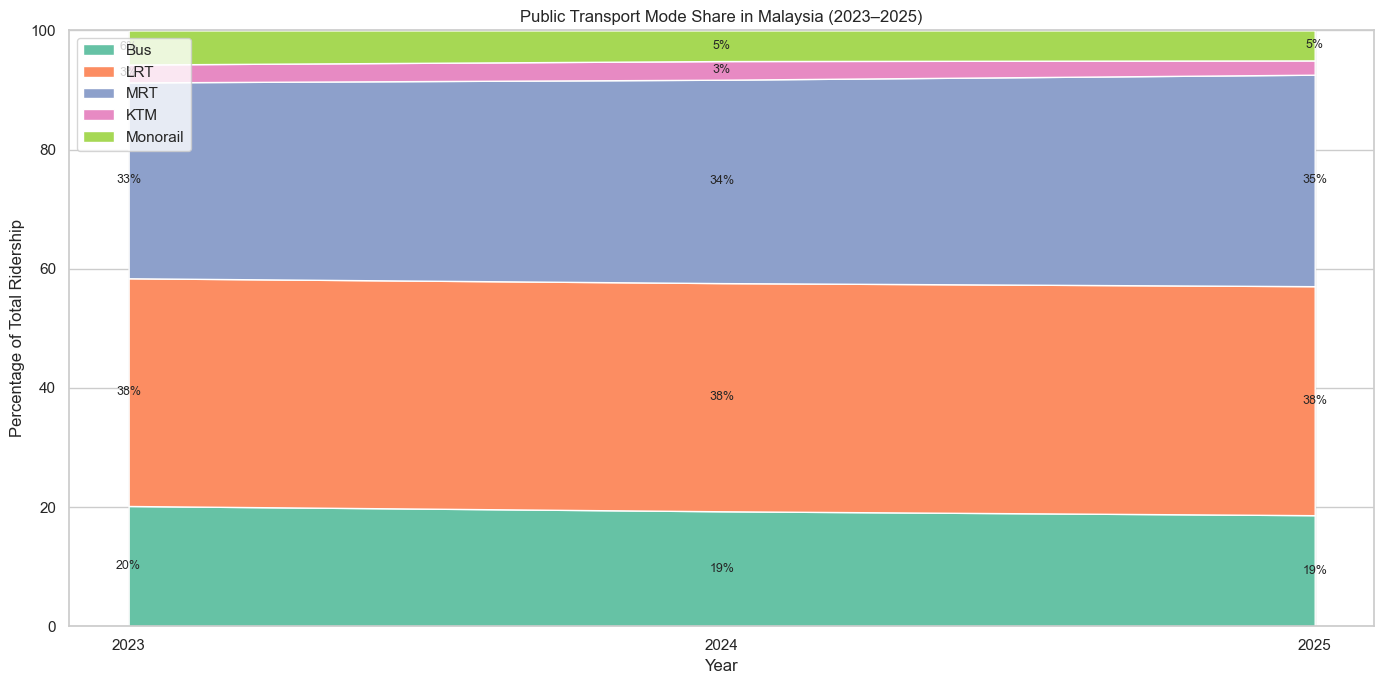

In [59]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
df = df.dropna(subset=['date'])
df['year'] = df['date'].dt.year

#Define transport groups
bus_cols = ['bus_rkl']
lrt_cols = ['rail_lrt_ampang', 'rail_lrt_kj']
mrt_cols = ['rail_mrt_kajang', 'rail_mrt_pjy']
ktm_cols = ['rail_komuter']
mono_cols = ['rail_monorail']

all_cols = bus_cols + lrt_cols + mrt_cols + ktm_cols + mono_cols
for col in all_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

#Calculate totals per mode
df['bus_total'] = df[bus_cols].sum(axis=1)
df['lrt_total'] = df[lrt_cols].sum(axis=1)
df['mrt_total'] = df[mrt_cols].sum(axis=1)
df['ktm_total'] = df[ktm_cols].sum(axis=1)
df['monorail_total'] = df[mono_cols].sum(axis=1)
df['system_total'] = df[['bus_total','lrt_total','mrt_total','ktm_total','monorail_total']].sum(axis=1)

#Aggregate yearly totals
yearly = df.groupby('year')[['bus_total','lrt_total','mrt_total','ktm_total','monorail_total','system_total']].sum().reset_index()

#Convert to percentage
yearly['bus_%'] = yearly['bus_total'] / yearly['system_total'] * 100
yearly['lrt_%'] = yearly['lrt_total'] / yearly['system_total'] * 100
yearly['mrt_%'] = yearly['mrt_total'] / yearly['system_total'] * 100
yearly['ktm_%'] = yearly['ktm_total'] / yearly['system_total'] * 100
yearly['monorail_%'] = yearly['monorail_total'] / yearly['system_total'] * 100

#Prepare data for stackplot
x = yearly['year'].astype(str)  # convert year to string for x-axis labels
y = [
    yearly['bus_%'],
    yearly['lrt_%'],
    yearly['mrt_%'],
    yearly['ktm_%'],
    yearly['monorail_%']
]
labels = ['Bus', 'LRT', 'MRT', 'KTM', 'Monorail']
colors = sns.color_palette("Set2", len(y))

#Plot stacked area chart
sns.set(style="whitegrid")
plt.figure(figsize=(14,7))

plt.stackplot(x, y, labels=labels, colors=colors)

#Add percentage labels for each year
for i, year in enumerate(x):
    bottom = 0
    for j, mode in enumerate(y):
        pct = mode.iloc[i]
        if pct < 3:  # skip very small percentages
            bottom += pct
            continue
        plt.text(i, bottom + pct/2, f"{pct:.0f}%", ha='center', va='center', fontsize=9)
        bottom += pct

#Labels
plt.title('Public Transport Mode Share in Malaysia (2023–2025)')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Ridership')
plt.ylim(0,100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 10. Weekday vs Weekend Average Daily Ridership Percentage by Year for Klang Valley (2023–2025)

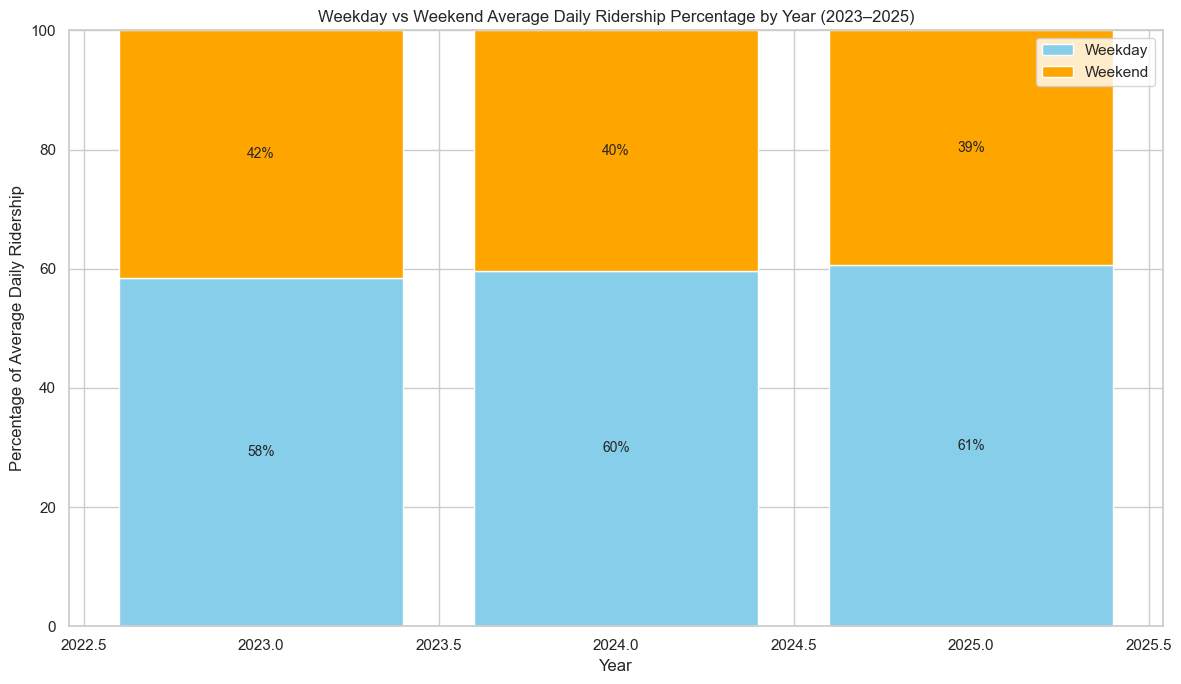

In [60]:
#Prepare
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
df = df.dropna(subset=['date'])
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.weekday  # Monday=0, Sunday=6

#Transport columns
all_transport_cols = [
    'bus_rkl',
    'rail_lrt_ampang','rail_lrt_kj',
    'rail_mrt_kajang','rail_mrt_pjy',
    'rail_komuter',
    'rail_monorail'
]

for col in all_transport_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

#Total daily ridership
df['total_ridership'] = df[all_transport_cols].sum(axis=1)

#Mark weekday vs weekend
df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x >=5 else 'Weekday')

#Aggregate by year and day_type
agg = df.groupby(['year','day_type'])['total_ridership'].sum().reset_index()

#Divide by number of days in each type for average daily ridership
def adjust_avg(row):
    if row['day_type'] == 'Weekday':
        return row['total_ridership'] / 5  # average per weekday
    else:
        return row['total_ridership'] / 2  # average per weekend day

agg['avg_daily_ridership'] = agg.apply(adjust_avg, axis=1)

#Pivot for plotting
pivot = agg.pivot(index='year', columns='day_type', values='avg_daily_ridership').fillna(0)

#Calculate percentage
pivot['total_avg'] = pivot['Weekday'] + pivot['Weekend']
pivot['Weekday_pct'] = pivot['Weekday'] / pivot['total_avg'] * 100
pivot['Weekend_pct'] = pivot['Weekend'] / pivot['total_avg'] * 100

# Plot stacked bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(12,7))

plt.bar(pivot.index, pivot['Weekday_pct'], label='Weekday', color='skyblue')
plt.bar(pivot.index, pivot['Weekend_pct'], bottom=pivot['Weekday_pct'], label='Weekend', color='orange')

#Annotate percentage
for i, row in pivot.iterrows():
    plt.text(i, row['Weekday_pct']/2, f"{row['Weekday_pct']:.0f}%", ha='center', va='center', fontsize=10)
    plt.text(i, row['Weekday_pct'] + row['Weekend_pct']/2, f"{row['Weekend_pct']:.0f}%", ha='center', va='center', fontsize=10)

plt.title('Weekday vs Weekend Average Daily Ridership Percentage by Year (2023–2025)')
plt.xlabel('Year')
plt.ylabel('Percentage of Average Daily Ridership')
plt.ylim(0,100)
plt.legend()
plt.tight_layout()
plt.show()

## 11. Calendar Heatmap of Daily Public Transport Ridership in Klang Valley (2023–2025)

<Figure size 2000x1000 with 0 Axes>

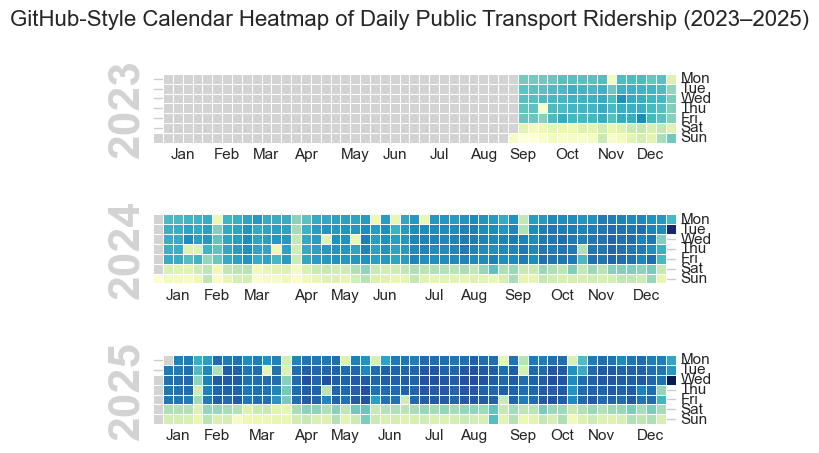

In [86]:
#Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
df = df.dropna(subset=['date'])

# Define transport lines
lines = [
    'bus_rkl',
    'rail_lrt_ampang', 'rail_lrt_kj',
    'rail_mrt_kajang','rail_mrt_pjy',
    'rail_komuter',
    'rail_monorail'
]

#Convert to numeric and fill NaN with 0
for col in lines:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

#Total daily ridership
df['total_ridership'] = df[lines].sum(axis=1)

#Filter 2019 -  2025
df = df[(df['date'].dt.year >= 2019) & (df['date'].dt.year <= 2025)]

#Create Series indexed by date
daily_series = pd.Series(df['total_ridership'].values, index=df['date'])

#Month labels for calmap
month_labels = [calendar.month_abbr[i] for i in range(1,13)]

#Plot
plt.figure(figsize=(20,10))
calmap.calendarplot(
    daily_series, 
    how='sum', 
    yearlabels=True, 
    monthlabels=month_labels, 
    cmap='YlGnBu', 
    fillcolor='lightgray', 
    linewidth=0.5
)
plt.suptitle('GitHub-Style Calendar Heatmap of Daily Public Transport Ridership (2023–2025)', fontsize=16)
plt.show()